In [372]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.linear_model import LinearRegression # линейная регрессия
# from sklearn.metrics import r2_score # подгружаем метрику r2
from sklearn.preprocessing import PolynomialFeatures

In [373]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter=',')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


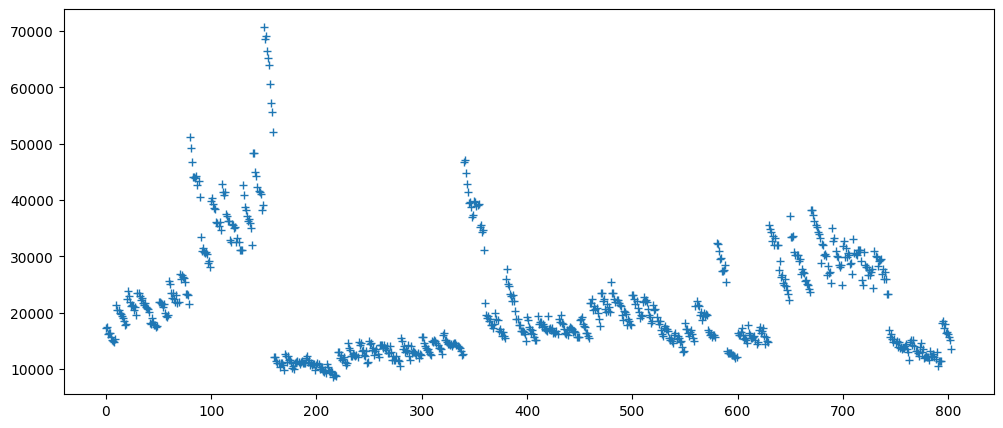

In [374]:

data_price = data['Price']

plt.figure(figsize=(12, 5))
plt.plot(data_price, "+")

In [375]:
model = LinearRegression()
model.fit(data[['Mileage']], data['Price'])
print(model.score(data[['Mileage']], data['Price']))

0.02046344732348926


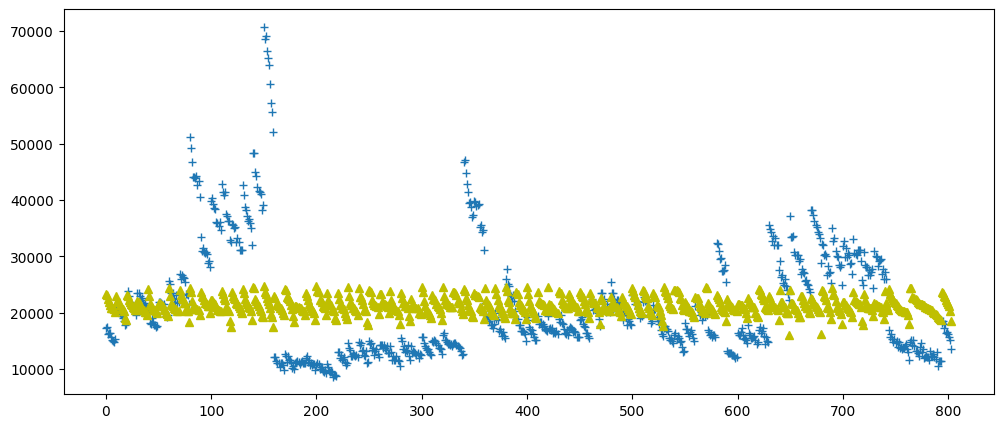

In [376]:
y_predict = model.predict(data[['Mileage']])

plt.figure(figsize=(12, 5))
plt.plot(data_price.index, data_price, "+")
plt.plot(data_price.index, y_predict, 'y^')

In [377]:
model = LinearRegression()
source_data = data[['Mileage', 'Liter', 'Cylinder', 'Leather', 'Cruise', 'Sound']]
model.fit(source_data, data['Price'])
y_predict = model.predict(source_data)
print(model.score(source_data, data['Price']))
source_data.head()

0.43014148406475605


,Mileage,Liter,Cylinder,Leather,Cruise,Sound
0,8221,3.1,6,1,1,1
1,9135,3.1,6,0,1,1
2,13196,3.1,6,0,1,1
3,16342,3.1,6,0,1,0
4,19832,3.1,6,1,1,0


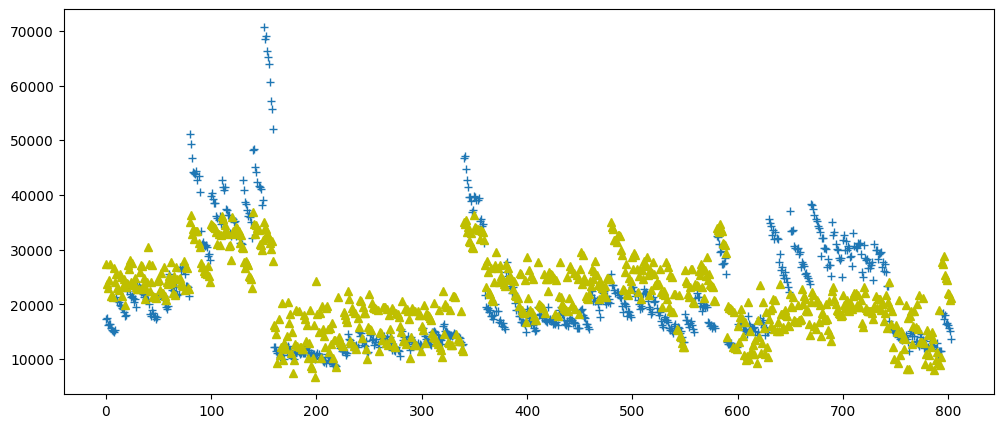

In [378]:
plt.figure(figsize=(12, 5))
plt.plot(data_price.index, data_price, "+")
plt.plot(data_price.index, y_predict, 'y^')
plt.show()

In [379]:
def des_func(x):
    return x ** 2 * np.sin(x)

In [380]:
X_data = np.linspace(1, 100, 99)
Y_data = des_func(X_data)

In [381]:
model = LinearRegression()
X_data = X_data.reshape(-1, 1)
model.fit(X_data, Y_data)
lr_predict = model.predict(X_data)
r2 = model.score(X_data, Y_data)
print('R2:', r2)

R2: 0.003248790830213455


In [382]:
polynomial_features = PolynomialFeatures(degree=50)
x_poly = polynomial_features.fit_transform(X_data)

poly_model = LinearRegression()
poly_model.fit(x_poly, Y_data)
y_poly_pred = poly_model.predict(x_poly)
r2 = poly_model.score(x_poly, Y_data)
print('R2:', r2)

# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(X_data, y_poly_pred), key=sort_axis)
# print(*zip(X_data, y_poly_pred))
# x_, y_poly_pred = zip(*sorted_zip)
x_ = X_data


R2: 0.23016407510730696


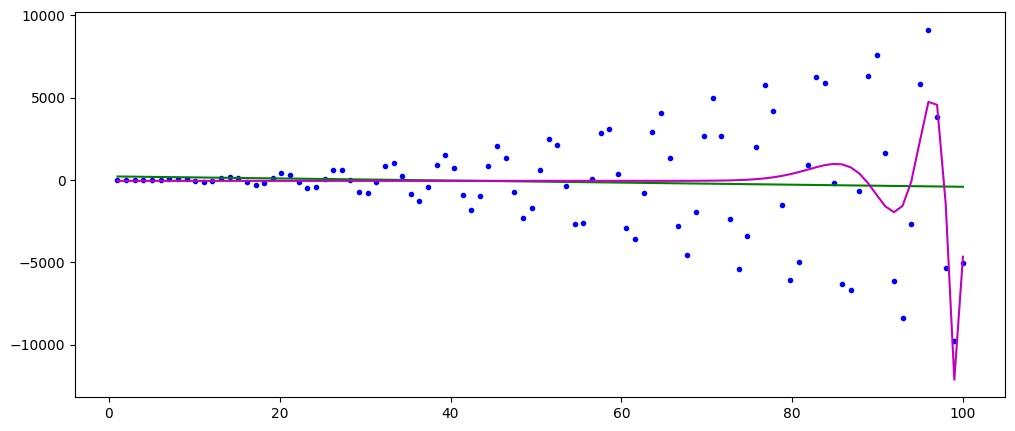

In [383]:
plt.figure(figsize=(12, 5))
plt.plot(X_data, Y_data, "b.")
plt.plot(X_data, lr_predict, "g-")
plt.plot(x_, y_poly_pred, 'm-')
plt.show()

In [384]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(source_data)

poly_model = LinearRegression()
poly_model.fit(x_poly, data_price)
y_poly_pred = poly_model.predict(x_poly)
r2 = poly_model.score(x_poly, data_price)
print('R2:', r2)

R2: 0.6260493147743563


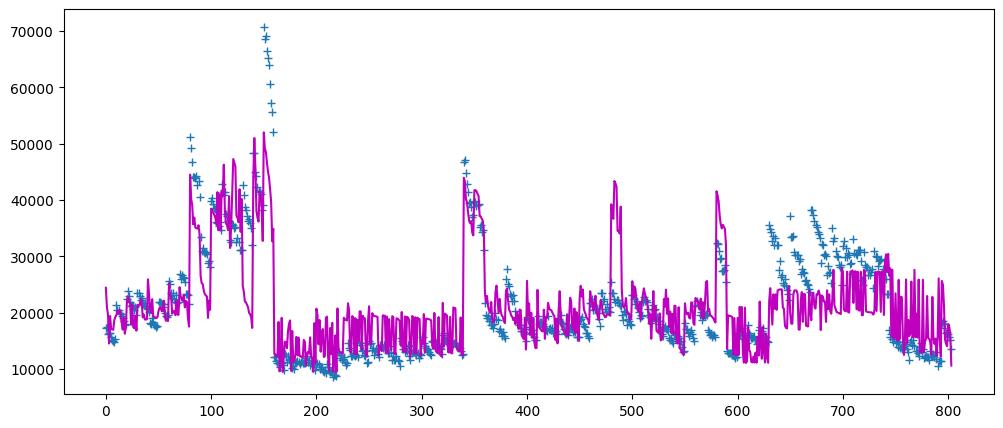

In [385]:
plt.figure(figsize=(12, 5))
plt.plot(data_price.index, data_price, "+")
plt.plot(data_price.index, y_poly_pred, 'm-')
plt.show()